In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

In [2]:
from pathlib import Path
data_folder = Path.cwd().parent.joinpath('#task4-eda','datasets') 
input_filename = 'OUTPUT_WBI_exposer_cyclones_v14.csv'
input_file = Path(data_folder).joinpath(input_filename)
init_data = pd.read_csv(input_file,sep=";")

In [3]:
init_data.head()

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,194046
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,642117
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,20200
3,1951337N09150,AMY,PHL,1951,"[(12.0725, 130.967), (12.1333, 130.517), (12.1...","[(11.7833, 127.9)]","[(10.7333, 124.8), (10.534, 123.174), (10.6833...",WP,WP,12,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,4.760039e+06,3.006670e+06,1.114774e+06,60000
4,1952180N05144,EMMA,PHL,1952,"[(9.33776, 130.185), (9.38633, 129.61), (9.45,...","[(9.45, 129.017), (9.50407, 128.407), (9.56613...","[(10.4667, 123.867), (10.6492, 123.239), (10.8...",WP,WP,7,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,5.130796e+06,2.789486e+06,1.988524e+06,103


In [4]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 51 columns):
SID                                                   991 non-null object
NAME                                                  991 non-null object
ISO                                                   991 non-null object
YEAR                                                  991 non-null int64
COORDS                                                991 non-null object
COORDS_MAX_WINDS                                      991 non-null object
COORDS_MIN_DIST2LAND                                  991 non-null object
BASIN                                                 991 non-null object
SUB BASIN                                             991 non-null object
MONTH_START                                           991 non-null int64
MONTH_END                                             991 non-null int64
DATE_START                                            991 non-null object
DATE_END  

### 1. Feature Selection

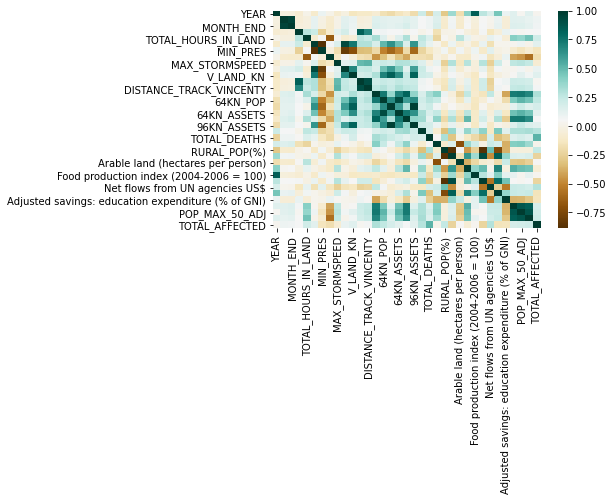

In [5]:
## Numerical Features
## Performing the correlation for all the features
spearman_corr = init_data.corr(method='spearman')
sns.heatmap(spearman_corr, cmap="BrBG")

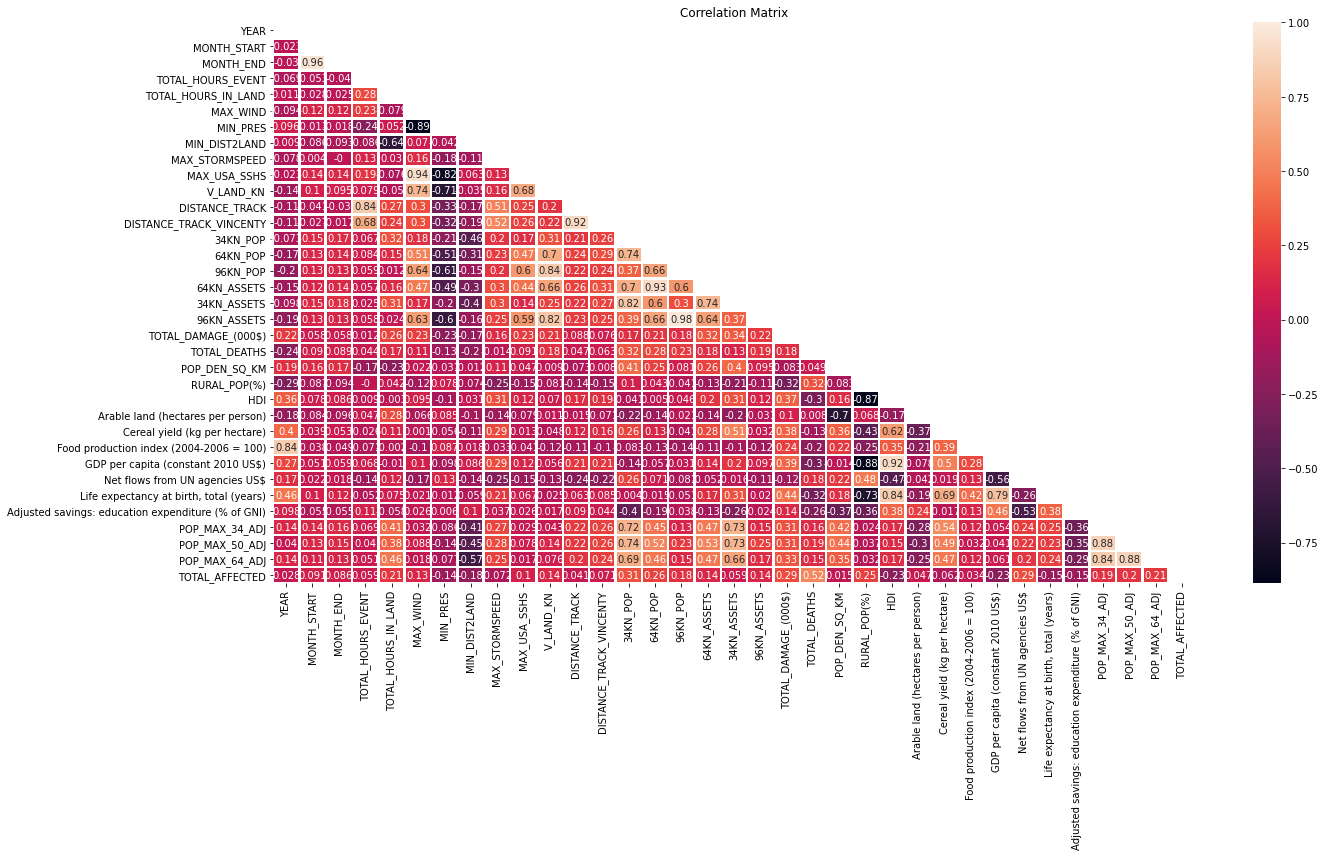

In [6]:
## Copied from Dev's Implementation for a better plot
plt.figure(figsize = (20, 12))
mask = np.triu(np.ones_like(init_data.corr(method = 'spearman'), dtype=bool))
sns.heatmap(round(init_data.corr(method = 'spearman'), 3), mask=mask, annot=True, linewidths=1.5)
plt.title('Correlation Matrix')
plt.tight_layout()
# plt.savefig('plots/cormat.png')
plt.show()

In [7]:
spearman_corr['TOTAL_AFFECTED'].sort_values(ascending = False)

TOTAL_AFFECTED                                        1.000000
TOTAL_DEATHS                                          0.521623
34KN_POP                                              0.313103
Net flows from UN agencies US$                        0.295261
TOTAL_DAMAGE_(000$)                                   0.287962
64KN_POP                                              0.260846
RURAL_POP(%)                                          0.249751
POP_MAX_64_ADJ                                        0.212022
TOTAL_HOURS_IN_LAND                                   0.209744
POP_MAX_50_ADJ                                        0.201107
POP_MAX_34_ADJ                                        0.188636
96KN_POP                                              0.184835
V_LAND_KN                                             0.143085
64KN_ASSETS                                           0.137412
96KN_ASSETS                                           0.136412
MAX_WIND                                              0

In [8]:
## Checking the skewness of the dataset
init_data.describe()

,YEAR,MONTH_START,MONTH_END,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS,...,Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,989.000000,991.000000,...,981.000000,987.000000,982.000000,9.910000e+02,987.000000,981.000000,9.110000e+02,9.110000e+02,9.110000e+02,9.910000e+02
mean,1999.789102,7.770938,7.833502,89.267238,20.097713,86.881699,939.110999,16.533804,18.303832,1.776993,...,3501.024220,93.329764,9911.140931,2.150700e+07,70.304835,3.248915,2.770093e+07,1.504009e+07,5.948569e+06,5.816176e+05
std,14.508337,2.766138,2.781165,73.284572,35.257498,33.635653,137.722579,40.005664,9.563449,1.913196,...,1725.269712,29.318225,15185.727417,2.667692e+07,7.495767,1.864046,4.367805e+07,2.775383e+07,1.159195e+07,2.004164e+06
min,1949.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,...,393.300000,13.360000,141.276363,-2.000000e+04,41.762000,0.538881,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,1991.000000,7.000000,7.000000,33.000000,0.000000,60.000000,937.000000,0.000000,13.000000,0.000000,...,2059.700000,76.160000,1412.947077,1.030000e+06,66.511671,1.840000,3.072560e+06,1.057294e+06,2.767477e+05,3.038000e+03
50%,2004.000000,8.000000,9.000000,75.000000,6.000000,85.000000,960.000000,0.000000,16.000000,1.000000,...,3319.800000,98.770000,2605.425404,1.231000e+07,70.802000,2.800000,1.099835e+07,4.367111e+06,1.566158e+06,3.000000e+04
75%,2011.000000,10.000000,10.000000,123.000000,24.000000,115.000000,980.000000,0.000000,21.000000,4.000000,...,4944.900000,113.950000,8918.568543,3.145000e+07,75.087500,4.297143,3.286035e+07,1.691340e+07,5.752552e+06,2.460315e+05
max,2019.000000,12.000000,12.000000,516.000000,333.000000,185.000000,1013.000000,199.000000,69.000000,5.000000,...,8900.000000,202.377089,86150.462210,1.837500e+08,84.099756,14.010000,3.764972e+08,3.222762e+08,1.073686e+08,2.962200e+07


(array([941.,  27.,   9.,   8.,   1.,   2.,   2.,   0.,   0.,   1.]),
 array([2.00000000e+00, 2.96220180e+06, 5.92440160e+06, 8.88660140e+06,
        1.18488012e+07, 1.48110010e+07, 1.77732008e+07, 2.07354006e+07,
        2.36976004e+07, 2.66598002e+07, 2.96220000e+07]),
 <a list of 10 Patch objects>)

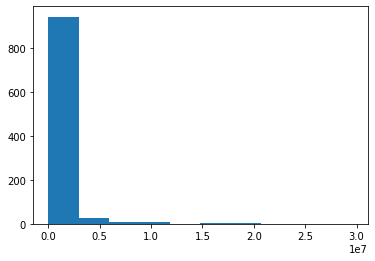

In [9]:
# Removing the skewness from the target
plt.hist(init_data['TOTAL_AFFECTED'])

(array([ 13.,  16.,  50., 105., 159., 198., 190., 151.,  83.,  26.]),
 array([ 0.69314718,  2.34423525,  3.99532332,  5.64641139,  7.29749946,
         8.94858753, 10.5996756 , 12.25076367, 13.90185175, 15.55293982,
        17.20402789]),
 <a list of 10 Patch objects>)

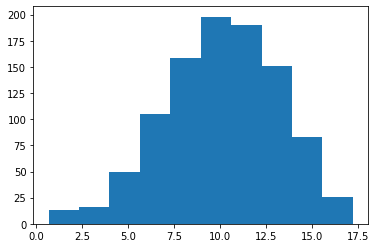

In [10]:
plt.hist(np.log(init_data['TOTAL_AFFECTED']))

In [11]:
# so performing the logarithm on the target to remove the skewness [Suggested by @Xavier]
init_data['TOTAL_AFFECTED'] = np.log(init_data['TOTAL_AFFECTED'])

### 1.1 Manual Selection

In [12]:
# Looks the like the correlation has improved in the new dataset, the highest correlated is total deaths of 0.52
# Selecting features which have atleast 0.1 correlation and removing the others either not correlated or less cannot be used in preediction
num_features = ['TOTAL_HOURS_IN_LAND', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'V_LAND_KN',
               'RURAL_POP(%)', 'HDI', 'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
               'Adjusted savings: education expenditure (% of GNI)', 'TOTAL_AFFECTED']

In [13]:
## Selection of the categorical variables by using pivot_tables
# Nature
print(init_data.pivot_table(index='NATURE', values='TOTAL_AFFECTED', aggfunc=np.sum))
print(init_data.pivot_table(index=['BASIN', 'SUB BASIN'], values='TOTAL_AFFECTED', aggfunc=np.sum))

        TOTAL_AFFECTED
NATURE                
DS           78.513775
ET          171.337730
MX           60.729516
NR          532.848059
SS           38.814934
TS         9113.967736
                 TOTAL_AFFECTED
BASIN SUB BASIN                
EP    CP              33.376425
      CS              32.880185
      EP             443.849450
      GM              10.126631
NAm   CS            1073.711863
      GM             657.949822
      NAm            325.476771
NI    AS             115.882258
      BB             326.966053
SI    SI             758.186978
      WA              93.328902
SP    EA             160.958735
      SP             376.329157
WP    WP            5587.188522


In [14]:
init_data.pivot_table(index=['MONTH_START'], values='TOTAL_AFFECTED', aggfunc=np.sum)

,TOTAL_AFFECTED
MONTH_START,
1,472.468524
2,335.606247
3,301.125075
4,257.543339
5,420.849711
6,473.793253
7,1117.111160
8,1662.998063
9,2139.916316


In [15]:
init_data.pivot_table(index=['MONTH_END'], values='TOTAL_AFFECTED', aggfunc=np.sum)

,TOTAL_AFFECTED
MONTH_END,
1,410.306211
2,386.229864
3,337.404098
4,243.781911
5,454.940806
6,386.154414
7,1116.915623
8,1467.803933
9,2227.329921


In [16]:
# GENERAL_CATEGORY
init_data.pivot_table(index=['GENERAL_CATEGORY','Income_level_Final'], values='TOTAL_AFFECTED')

TOTAL_AFFECTED
GENERAL_CATEGORY Income_level_Final                
Cat 1            High                      7.554289
                 High_Middle              10.808562
                 Low                       9.995657
                 Low_Middle               10.982891
Cat 2            High                      8.723087
                 High_Middle               9.426473
                 Low                       9.697624
                 Low_Middle               10.557665
Cat 3            High                      8.812011
                 High_Middle               9.876404
                 Low                      10.064483
                 Low_Middle               10.975190
Cat 4            High                      8.833165
                 High_Middle              10.345938
                 Low                      11.209020
                 Low_Middle               11.124640
Cat 5            High                      8.972850
                 High_Middle              10.810987
                 Low                       9.068994
                 Low_Middle               12.661755
TD               High                      9.306976
                 High_Middle               8.730899
                 Low                       8.888821
                 Low_Middle                9.758702
TS               High                      7.579151
                 High_Middle               9.211479
                 Low                       9.942120
                 Low_Middle               10.026424

In [17]:
init_data.pivot_table(index=['Income_level_Final'], values='TOTAL_AFFECTED')

,TOTAL_AFFECTED
Income_level_Final,
High,8.473904
High_Middle,9.968250
Low,10.153343
Low_Middle,10.787563


In [18]:
init_data.pivot_table(index='MAX_USA_SSHS', values='TOTAL_AFFECTED')

,TOTAL_AFFECTED
MAX_USA_SSHS,
-6,7.600902
-5,9.745484
-4,14.030622
-3,9.745103
-2,10.596635
-1,10.095420
0,9.583848
1,10.132853
2,9.885691


In [19]:
## Considering the categorical variables GENERAL_CATEGORY, MONTH_END, BASIN, SUB BASIN and NATURE, MAX_USA_SSHS
cat_features = ['GENERAL_CATEGORY', 'MONTH_END','BASIN', 'SUB BASIN', 'NATURE', 'Income_level_Final']

In [20]:
data1 = init_data[num_features + cat_features]

In [21]:
data1['MONTH_END'] = data1['MONTH_END'].apply(lambda x:str(x))
# data1['MAX_USA_SSHS'] = data1['MAX_USA_SSHS'].apply(lambda x: str(x))

/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data1 = pd.concat([pd.get_dummies(data1[cat_features]), data1],axis=1)
data1 = data1.dropna()

In [23]:
X_manual = data1.drop('TOTAL_AFFECTED',axis=1)
y_manual = data1['TOTAL_AFFECTED']

In [24]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data1, data1['GENERAL_CATEGORY']):
    train_x_man, test_x_man = X_manual.iloc[train_index], X_manual.iloc[test_index]
    train_y_man, test_y_man = y_manual.iloc[train_index], y_manual.iloc[test_index]

In [25]:
train_x_man.drop(columns = cat_features, axis=1, inplace=True)
test_x_man.drop(columns= cat_features, axis=1, inplace=True)

/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man['MIN_PRES'] = train_x_man['MIN_PRES'].astype('float64')
test_x_man['MIN_PRES'] = test_x_man['MIN_PRES'].astype('float64')

train_x_man['MIN_DIST2LAND'] = train_x_man['MIN_DIST2LAND'].astype('float64')
test_x_man['MIN_DIST2LAND'] = test_x_man['MIN_DIST2LAND'].astype('float64')

cols_man = train_x_man.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man:
    train_x_man[col] = ss1_scaler.fit_transform(train_x_man[[col]])
    test_x_man[col] = ss1_scaler.transform(test_x_man[[col]])

/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/pytho

In [27]:
train_x_man.head(3)

,GENERAL_CATEGORY_Cat 1,GENERAL_CATEGORY_Cat 2,GENERAL_CATEGORY_Cat 3,GENERAL_CATEGORY_Cat 4,GENERAL_CATEGORY_Cat 5,GENERAL_CATEGORY_TD,GENERAL_CATEGORY_TS,MONTH_END_1,MONTH_END_10,MONTH_END_11,...,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,V_LAND_KN,RURAL_POP(%),HDI,GDP per capita (constant 2010 US$),Net flows from UN agencies US$,Adjusted savings: education expenditure (% of GNI)
223,1,0,0,0,0,0,0,0,1,0,...,-0.569453,-0.199797,0.187445,-0.129197,-0.038046,1.195626,-1.195026,-0.592049,2.929866,-0.877564
192,0,0,1,0,0,0,0,0,1,0,...,-0.569453,0.603628,-0.050595,0.736484,-0.031852,0.351502,-0.542333,-0.544355,0.010748,-0.715863
779,0,0,0,0,0,0,1,0,1,0,...,-0.569453,-1.092492,0.331712,2.518768,-0.049373,1.537839,0.719050,-0.416886,0.194429,-0.969194


### 1.2 Considering the features by PCA & rbf Kernel PCA

In [28]:
data2 = init_data.copy()

In [29]:
data2.head(3)

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,12.175851
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,13.372526
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,9.913438


In [30]:
## Dropping the unnecessary columns
data2 = data2.drop(columns = ['SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'COORDS_MAX_WINDS', 'COORDS_MIN_DIST2LAND','MONTH_START',
                             'DATE_START','DATE_END', 'DATE_LAND_START', 'DATE_LAND_END','MAX_USA_SSHS_INLAND','MAX_USA_SSHS'],axis=1)

In [31]:
data2['MONTH_END'] = data2['MONTH_END'].apply(lambda x:str(x))
# data2['MAX_USA_SSHS'] = data2['MAX_USA_SSHS'].apply(lambda x: str(x))

In [32]:
data2 = pd.concat([pd.get_dummies(data2[cat_features]),data2],axis=1)
data2 = data2.dropna()

In [33]:
X_pca = data2.drop(columns='TOTAL_AFFECTED',axis=1)
y_pca = data2['TOTAL_AFFECTED']

In [34]:
for train_index, test_index in sss.split(data2, data2['GENERAL_CATEGORY']):
    train_x_pca, test_x_pca = X_pca.iloc[train_index], X_pca.iloc[test_index]
    train_y_pca, test_y_pca = y_pca.iloc[train_index], y_pca.iloc[test_index]

In [35]:
train_x_pca.drop(columns = cat_features, axis=1, inplace=True)
test_x_pca.drop(columns= cat_features, axis=1, inplace=True)

/Users/vamsi/Documents/Programming_projects/wfp_challenge/venv/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(0.95)

- PCA cannot work with NANs so
- Removing Nans
- Scaling effects the values for PCA so performing a StandardScaler normalization

In [37]:
train_x_pca1_na = train_x_pca.dropna()
test_x_pca1_na = test_x_pca.dropna()
ss_scaler = StandardScaler()
train_x_pca1_na['MIN_PRES'] = train_x_pca1_na['MIN_PRES'].astype('float64')
test_x_pca1_na['MIN_PRES'] = test_x_pca1_na['MIN_PRES'].astype('float64')
train_x_pca1_na['MIN_DIST2LAND'] = train_x_pca1_na.astype('float64')
test_x_pca1_na['MIN_DIST2LAND'] = test_x_pca1_na.astype('float64')
cols_norm = train_x_pca1_na.select_dtypes(include=['float64']).columns.to_list()
for col in cols_norm:
    train_x_pca1_na[col] = ss_scaler.fit_transform(train_x_pca1_na[[col]])
    test_x_pca1_na[col] = ss_scaler.transform(test_x_pca1_na[[col]])

pca.fit(train_x_pca1_na)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.explained_variance_ratio_

array([0.21390775, 0.13816158, 0.0945557 , 0.07579395, 0.05267034,
       0.04022232, 0.03326565, 0.0310435 , 0.02974056, 0.02813574,
       0.02617409, 0.02438412, 0.02183379, 0.02069719, 0.01623704,
       0.01576875, 0.0127378 , 0.01124923, 0.00951951, 0.00818373,
       0.00777426, 0.0073253 , 0.0067708 , 0.00597387, 0.00536551,
       0.00510202, 0.0049302 , 0.0045231 ])

In [39]:
pca.singular_values_

array([52.32744471, 42.05425152, 34.79045681, 31.14824234, 25.96565723,
       22.69079962, 20.63546672, 19.9343285 , 19.51150824, 18.97778201,
       18.30425397, 17.667285  , 16.7178668 , 16.27691102, 14.41682761,
       14.20740967, 12.76919537, 11.99989848, 11.03884562, 10.23509568,
        9.97575704,  9.68342658,  9.30970989,  8.74468761,  8.28746267,
        8.08141078,  7.9441738 ,  7.60912034])

In [40]:
train_x_pca1_na = pd.DataFrame(pca.transform(train_x_pca1_na))
test_x_pca1_na = pd.DataFrame(pca.transform(test_x_pca1_na))

In [41]:
train_x_pca1_na

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-2.005207,1.984591,-0.039026,1.030942,0.645828,-0.102140,-0.003981,-0.535837,-0.268857,0.460480,...,-0.508189,-0.076539,-0.145672,0.168362,-0.251281,0.541475,-0.255539,-0.163406,0.832320,-0.653103
1,-1.820876,0.964686,1.953560,-0.268594,-0.716884,0.196421,0.947727,-0.197221,1.264494,-1.181857,...,1.345655,0.335330,0.361687,-0.431608,0.463280,0.223960,-0.558391,-0.554582,-0.207969,0.203421
2,-0.881579,-1.765680,0.642284,-0.431029,-0.249067,-1.533310,-0.061789,-0.234774,1.394583,-0.512550,...,1.151047,-1.260445,0.471714,0.417160,0.076247,-0.586275,-0.126941,0.400390,-0.251128,0.032746
3,-0.161433,4.526571,-0.479283,-0.582834,1.915412,-0.120130,0.005559,-0.315630,-1.254339,0.166100,...,0.926016,-0.044328,0.111814,0.123192,-0.484715,-0.095488,0.433649,-0.407124,-0.257237,-0.071953
4,-0.968348,0.917867,-2.860887,-0.662929,-0.444245,0.748822,-0.121722,-0.075388,-0.096006,-0.930408,...,0.044497,-0.043901,0.091496,-0.052222,0.131867,-0.221162,0.222599,-0.639588,0.049460,0.197997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-0.378992,-2.581989,-0.313107,1.875082,1.642584,1.311501,-0.852564,-1.014963,0.938410,0.177764,...,-0.106908,-0.426569,-0.040925,-0.185062,-0.219602,0.122056,0.141028,0.575048,0.010167,0.271438
378,-1.513993,-1.021427,-0.985745,1.809640,1.168780,0.522519,-0.597372,-0.476197,0.151583,0.211327,...,0.304188,-0.323970,-0.467378,0.458061,0.298432,0.068925,-0.242268,0.626163,-0.269060,0.140243
379,0.771612,2.469406,3.797519,-0.795303,1.275102,-0.097853,-0.983826,-0.054601,1.405989,-0.758477,...,-0.508772,-0.338570,0.179579,0.365424,0.845993,-0.457423,-0.105589,0.392839,0.081108,-0.055415
380,-3.218101,-0.415887,1.377025,0.741271,0.205261,0.083769,0.684267,0.430639,-1.013691,0.772849,...,-1.029514,0.104737,0.090489,0.491118,0.193314,0.032946,-0.146656,0.197796,-0.332784,0.250113


- Kernel PCA with rbf kernel expects all positive values
- So trying with Min Max scaler

In [42]:
pca_rbf = KernelPCA(fit_inverse_transform=True, kernel='rbf', n_components=None)

In [43]:
train_x_pca2_na = train_x_pca.dropna()
test_x_pca2_na = test_x_pca.dropna()
mm_scaler = MinMaxScaler()
train_x_pca2_na['MIN_PRES'] = train_x_pca2_na['MIN_PRES'].astype('float64')
test_x_pca2_na['MIN_PRES'] = test_x_pca2_na['MIN_PRES'].astype('float64')
train_x_pca2_na['MIN_DIST2LAND'] = train_x_pca2_na['MIN_DIST2LAND'].astype('float64')
test_x_pca2_na['MIN_DIST2LAND'] = test_x_pca2_na['MIN_DIST2LAND'].astype('float64')
# X_pca2['MIN_PRES'] = X_pca2.astype('float64')
# X_pca2['MIN_DIST2LAND'] = X_pca2.astype('float64')
cols_norm = train_x_pca2_na.select_dtypes(include=['float64']).columns.to_list()
for col in cols_norm:
    train_x_pca2_na[col] = mm_scaler.fit_transform(train_x_pca2_na[[col]])
    test_x_pca2_na[col] = mm_scaler.transform(test_x_pca2_na[[col]])
pca_rbf.fit(train_x_pca2_na)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=None, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [44]:
train_x_pca2_na = pd.DataFrame(pca_rbf.transform(train_x_pca2_na))
test_x_pca2_na = pd.DataFrame(pca_rbf.transform(test_x_pca2_na))

In [45]:
test_x_pca2_na

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,0.210493,-0.087522,-0.114787,0.053794,-0.098175,0.068885,-0.053460,-0.037503,-0.067803,-0.003512,...,-0.000067,-0.000186,0.000541,0.000311,0.000542,0.000043,-0.001136,0.001267,0.001258,-0.000562
1,0.014394,-0.109662,-0.049300,-0.032693,0.124150,-0.087687,0.069687,-0.028521,0.020970,-0.004111,...,-0.000121,0.007111,0.002496,-0.002860,0.004147,0.003378,0.000954,0.000601,0.001150,0.004023
2,-0.131269,0.006508,0.015394,0.015591,0.000026,-0.073394,-0.082594,0.087235,-0.044123,0.098654,...,-0.001528,0.000342,0.001332,0.000985,-0.000847,0.000410,0.000085,-0.000047,0.000873,-0.000749
3,0.271070,0.067783,-0.134545,-0.149316,0.034563,-0.030526,0.005982,-0.031042,-0.056678,-0.007212,...,-0.000358,0.000339,-0.000943,0.001334,-0.000393,-0.000255,0.000877,-0.003257,0.001375,-0.004637
4,-0.133777,-0.036552,-0.027705,-0.055726,0.068117,-0.059837,0.023696,0.053627,-0.090083,-0.024110,...,-0.001321,-0.000564,-0.000472,0.000345,0.000304,-0.000066,0.000631,0.000989,-0.000666,-0.000448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.187676,-0.152483,-0.077381,0.065817,-0.004883,-0.105747,0.056004,0.039588,-0.117317,0.009163,...,0.001342,-0.001435,0.000375,0.000012,-0.000328,0.000123,0.001451,-0.002729,-0.000490,-0.001405
92,-0.120325,-0.016816,-0.108806,-0.015525,0.078371,-0.101047,0.077825,-0.024948,0.059399,-0.023066,...,-0.000854,0.000718,-0.000341,-0.000327,0.000303,0.000359,-0.000708,0.000588,-0.000485,-0.000015
93,-0.159677,-0.049112,-0.058065,0.032302,0.029053,0.059929,-0.081487,-0.090503,-0.041005,-0.027824,...,0.000759,-0.000669,-0.000228,-0.000901,0.000233,-0.000576,-0.001884,0.001364,-0.000553,-0.000456
94,-0.026534,0.072575,0.057488,0.168498,-0.057252,-0.019314,0.103565,0.042083,-0.102583,0.010212,...,0.000981,-0.000342,0.001248,-0.000429,-0.001074,-0.001413,-0.000763,-0.001051,0.001217,-0.000546


### 2. Model

From the above Feature engineering, we have 3 sets of features 
- Manual selection of features :: train_x_man, test_x_man
- Selected features from Linear PCA :: train_x_pca1_na, test_x_pca1_na
- Selected features from RBF kernel PCA :: train_x_pca2_na, test_x_pca2_na

In [46]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [47]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

### 2.1 Working with Manual selection data
GRID search for manual selection Data
- SVR

In [48]:
## training initially on manual selection
grid_search_svr.fit(train_x_man, train_y_man)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
grid_search_svr.best_estimator_

SVR(C=5, cache_size=200, coef0=0.01, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred_man_svr = grid_search_svr.predict(test_x_man)

In [52]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr, test_y_man)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr, test_y_man)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr, test_y_man))}')

mean absolute error : 2.2443112638869382
mean squared error : 7.982914271363026
root mean squared error : 2.8254051517194885


- Random Forest

In [57]:
grid_search_rf.fit(train_x_man, train_y_man)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [58]:
grid_search_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
y_pred_man_rf = grid_search_rf.predict(test_x_man)

In [60]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_rf, test_y_man)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_rf, test_y_man)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_rf, test_y_man))}')

mean absolute error : 2.2139328706798955
mean squared error : 7.525792604083847
root mean squared error : 2.743317809529885


### 2.2 Working with Linear PCA

In [61]:
grid_search_svr.fit(train_x_pca1_na, train_y_pca)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
grid_search_svr.best_estimator_

SVR(C=5, cache_size=200, coef0=0.01, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
y_pred_linpca_svr = grid_search_svr.predict(test_x_pca1_na)

In [64]:
print(f'mean absolute error : {mean_absolute_error(y_pred_linpca_svr, test_y_pca)}')
print(f'mean squared error : {mean_squared_error(y_pred_linpca_svr, test_y_pca)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_linpca_svr, test_y_pca))}')

mean absolute error : 1.990991432326383
mean squared error : 6.979593780984537
root mean squared error : 2.641892083523575


In [65]:
grid_search_rf.fit(train_x_pca1_na, train_y_pca)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [66]:
grid_search_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
y_pred_linpca_rf = grid_search_rf.predict(test_x_pca1_na)

In [68]:
print(f'mean absolute error : {mean_absolute_error(y_pred_linpca_rf, test_y_pca)}')
print(f'mean squared error : {mean_squared_error(y_pred_linpca_rf, test_y_pca)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_linpca_rf, test_y_pca))}')

mean absolute error : 2.1270215467808646
mean squared error : 6.871168907684454
root mean squared error : 2.6212914579810564


### 2.3 Working with RBF kernal PCA features

In [69]:
grid_search_svr.fit(train_x_pca2_na, train_y_pca)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
grid_search_svr.best_estimator_

SVR(C=5, cache_size=200, coef0=0.01, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
y_pred_rbfpca_svr = grid_search_svr.predict(test_x_pca2_na)

In [72]:
print(f'mean absolute error : {mean_absolute_error(y_pred_rbfpca_svr, test_y_pca)}')
print(f'mean squared error : {mean_squared_error(y_pred_rbfpca_svr, test_y_pca)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_rbfpca_svr, test_y_pca))}')

mean absolute error : 2.233113677003829
mean squared error : 8.429862368381741
root mean squared error : 2.903422526671194


In [73]:
grid_search_rf.fit(train_x_pca2_na, train_y_pca)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [74]:
grid_search_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
y_pred_rbfpca_rf = grid_search_rf.predict(test_x_pca2_na)

In [76]:
print(f'mean absolute error : {mean_absolute_error(y_pred_rbfpca_rf, test_y_pca)}')
print(f'mean squared error : {mean_squared_error(y_pred_rbfpca_rf, test_y_pca)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_rbfpca_rf, test_y_pca))}')

mean absolute error : 2.4365695748812946
mean squared error : 9.22539761610822
root mean squared error : 3.0373339651918787
